In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#version proposée par notebook75af682bf5
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

import warnings

df= pd.read_csv("data/application_train.csv")
test = pd.read_csv("data/application_test.csv")
df = df[df['AMT_INCOME_TOTAL']<=395164.7058274159]

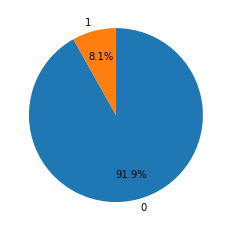

In [3]:
plt.pie(df['TARGET'].value_counts(),
       labels=[0,1], counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7,)

plt.show()

In [4]:
df_1 = df[df['TARGET'] == 1]
def bar_1(col):
    df_1_pie = pd.DataFrame(df_1.groupby(col).count()['TARGET']/ df.groupby(col).count()['TARGET']).reset_index().sort_values('TARGET')
    df_1_pie['TARGET'] = df_1_pie['TARGET']*100
    sns.barplot(y=df_1_pie[col], x=df_1_pie['TARGET'])
    plt.show()
    print(df_1_pie)
    
    
def bar_2(col):
    df_1_pie = pd.DataFrame(df_1.groupby(col).count()['TARGET']/ df.groupby(col).count()['TARGET']).reset_index().sort_values('TARGET')
    df_1_pie['TARGET'] = df_1_pie['TARGET']*100
    sns.barplot(x=df_1_pie[col], y=df_1_pie['TARGET'])
    plt.show()
    print(df_1_pie)

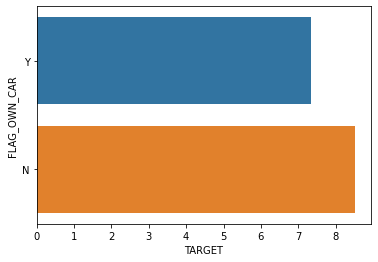

  FLAG_OWN_CAR    TARGET
1            Y  7.342559
0            N  8.529818


In [5]:
bar_1('FLAG_OWN_CAR')

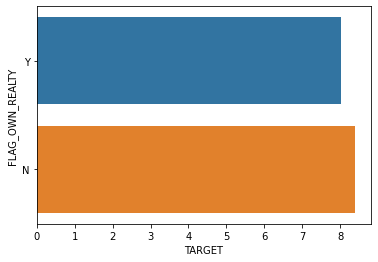

  FLAG_OWN_REALTY    TARGET
1               Y  8.018414
0               N  8.396930


In [6]:
bar_1('FLAG_OWN_REALTY')

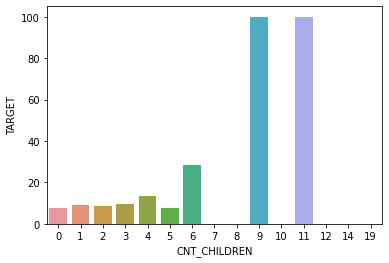

    CNT_CHILDREN      TARGET
5              5    7.500000
0              0    7.761120
2              2    8.802776
1              1    9.023165
3              3    9.747899
4              4   13.235294
6              6   28.571429
9              9  100.000000
11            11  100.000000
7              7         NaN
8              8         NaN
10            10         NaN
12            12         NaN
13            14         NaN
14            19         NaN


In [7]:
bar_2('CNT_CHILDREN')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


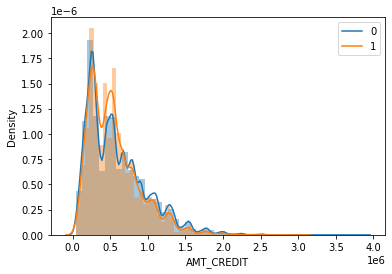

In [8]:
sns.distplot(df[df['TARGET']==0]['AMT_CREDIT'])
# plt.legend(labels=['0'])

sns.distplot(df[df['TARGET']==1]['AMT_CREDIT'])
plt.legend(labels=['0','1'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


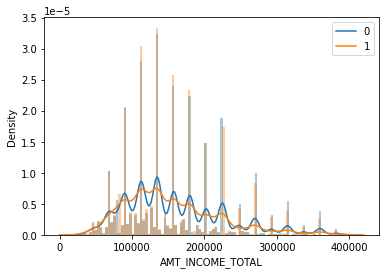

In [9]:

sns.distplot(df[df['TARGET']==0]['AMT_INCOME_TOTAL'], bins=100)


sns.distplot(df[df['TARGET']==1]['AMT_INCOME_TOTAL'], bins=100)
plt.legend(labels=['0','1'])
# plt.xlim(0,1e6)

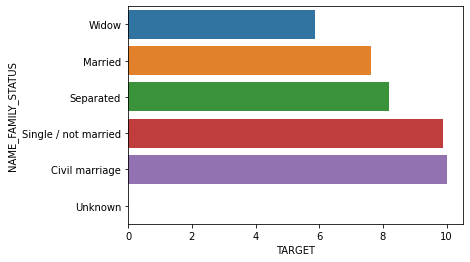

     NAME_FAMILY_STATUS     TARGET
5                 Widow   5.860529
1               Married   7.622057
2             Separated   8.193223
3  Single / not married   9.895763
0        Civil marriage  10.015461
4               Unknown        NaN


In [10]:
bar_1('NAME_FAMILY_STATUS')

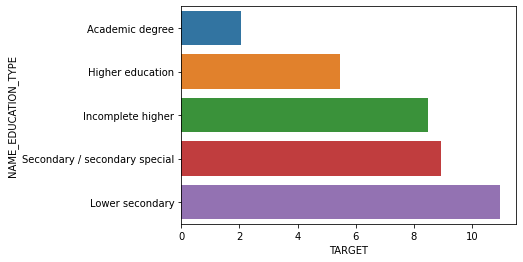

             NAME_EDUCATION_TYPE     TARGET
0                Academic degree   2.040816
1               Higher education   5.444245
2              Incomplete higher   8.486677
4  Secondary / secondary special   8.947312
3                Lower secondary  10.973358


In [11]:
bar_1('NAME_EDUCATION_TYPE')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


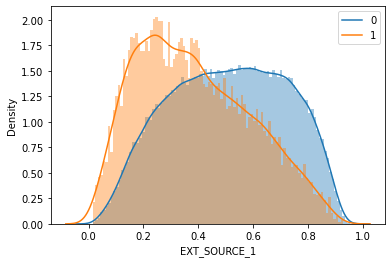

In [12]:
sns.distplot(df[df['TARGET']==0]['EXT_SOURCE_1'], bins=100)


sns.distplot(df[df['TARGET']==1]['EXT_SOURCE_1'], bins=100)
plt.legend(labels=['0','1'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


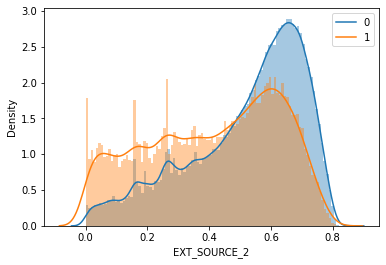

In [13]:
sns.distplot(df[df['TARGET']==0]['EXT_SOURCE_2'], bins=100)


sns.distplot(df[df['TARGET']==1]['EXT_SOURCE_2'], bins=100)
plt.legend(labels=['0','1'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


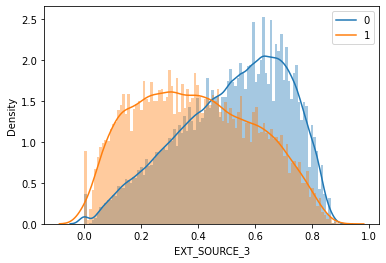

In [14]:
sns.distplot(df[df['TARGET']==0]['EXT_SOURCE_3'], bins=100)


sns.distplot(df[df['TARGET']==1]['EXT_SOURCE_3'], bins=100)
plt.legend(labels=['0','1'])

In [15]:
# ローンのクレジットに対する年収
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
# 一人当たりの収入
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
# 収入に対する年金
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
# ローンに対する年金
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

# 何年働いているか
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
# 外部スコアの平均など
df['APPS_EXT_SOURCE_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
df['APPS_EXT_SOURCE_STD'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
df['APPS_EXT_SOURCE_STD'] = df['APPS_EXT_SOURCE_STD'].fillna(df['APPS_EXT_SOURCE_STD'].mean())
df['APP_EXT_SOURCE_2*EXT_SOURCE_3*DAYS_BIRTH'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] *df['EXT_SOURCE_2'] * df['DAYS_BIRTH']

# その他
# Credit ratios
df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']

# Income ratios
df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']

# Time ratios
df['ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
df['CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
df['CAR_TO_EMPLOYED_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
df['PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']



# ---------------------------------------------


# ローンのクレジットに対する年収
test['INCOME_CREDIT_PERC'] = test['AMT_INCOME_TOTAL'] / test['AMT_CREDIT']
# 一人当たりの収入
test['INCOME_PER_PERSON'] = test['AMT_INCOME_TOTAL'] / test['CNT_FAM_MEMBERS']
# 収入に対する年金
test['ANNUITY_INCOME_PERC'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
# ローンに対する年金
test['PAYMENT_RATE'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']

# 何年働いているか
test['DAYS_EMPLOYED_PERC'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']
# 外部スコアの平均など
test['APPS_EXT_SOURCE_MEAN'] = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
test['APPS_EXT_SOURCE_STD'] = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
test['APPS_EXT_SOURCE_STD'] = test['APPS_EXT_SOURCE_STD'].fillna(test['APPS_EXT_SOURCE_STD'].mean())
test['APP_EXT_SOURCE_2*EXT_SOURCE_3*DAYS_BIRTH'] = test['EXT_SOURCE_1'] * test['EXT_SOURCE_2'] *test['EXT_SOURCE_2'] * df['DAYS_BIRTH']

# その他
# Credit ratios
test['CREDIT_TO_GOODS_RATIO'] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']

# Income ratios
test['INCOME_TO_EMPLOYED_RATIO'] = test['AMT_INCOME_TOTAL'] / test['DAYS_EMPLOYED']
test['INCOME_TO_BIRTH_RATIO'] = test['AMT_INCOME_TOTAL'] / test['DAYS_BIRTH']

# Time ratios
test['ID_TO_BIRTH_RATIO'] = test['DAYS_ID_PUBLISH'] / test['DAYS_BIRTH']
test['CAR_TO_BIRTH_RATIO'] = test['OWN_CAR_AGE'] / test['DAYS_BIRTH']
test['CAR_TO_EMPLOYED_RATIO'] = test['OWN_CAR_AGE'] / test['DAYS_EMPLOYED']
test['PHONE_TO_BIRTH_RATIO'] = test['DAYS_LAST_PHONE_CHANGE'] / test['DAYS_BIRTH']

In [16]:
from sklearn.preprocessing import LabelEncoder

col = df.columns

ob_list = []
for i in col:
    if df[i].dtype == object:
        ob_list.append(i)

le = LabelEncoder()
for col in ob_list:
    
    df[col] = le.fit_transform(df[col])
    test[col] = le.fit_transform(test[col])
    

In [17]:
train = df

from sklearn.metrics import roc_auc_score


import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import roc_auc_score


clf = lgb.LGBMClassifier(random_state=1, num_leaves=30, objective='binary', n_estimators=500)

X = train.drop(columns = ['SK_ID_CURR',	'TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_15',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_2', 'ELEVATORS_MEDI', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_4']).values
z = test.drop(columns = ['SK_ID_CURR','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_15',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_2', 'ELEVATORS_MEDI', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_4']).values



y = train['TARGET'].values

kf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
rmse_mean = []

pre_test_list = []

for train_index, test_index in kf.split(X,y):
    



    train_x, valid_x = X[train_index], X[test_index]
    train_y, valid_y = y[train_index], y[test_index]
    
    
    
    clf.fit(X = train_x, y = train_y, eval_set = (valid_x, valid_y) ,eval_metric='auc',early_stopping_rounds=100)
    
    
    
    
    valid_pre = clf.predict(valid_x)

    rmse =roc_auc_score( valid_y, valid_pre)
    
    rmse_mean.append(rmse)
    
    pre_test = clf.predict(z)
    
    pre_test_list.append(pre_test)
    
    

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.717032	valid_0's binary_logloss: 0.276088
[2]	valid_0's auc: 0.722594	valid_0's binary_logloss: 0.271857
[3]	valid_0's auc: 0.723671	valid_0's binary_logloss: 0.268623
[4]	valid_0's auc: 0.728222	valid_0's binary_logloss: 0.265902
[5]	valid_0's auc: 0.730284	valid_0's binary_logloss: 0.263721
[6]	valid_0's auc: 0.732201	valid_0's binary_logloss: 0.261867
[7]	valid_0's auc: 0.73352	valid_0's binary_logloss: 0.26042
[8]	valid_0's auc: 0.735231	valid_0's binary_logloss: 0.259147
[9]	valid_0's auc: 0.736034	valid_0's binary_logloss: 0.258065
[10]	valid_0's auc: 0.737031	valid_0's binary_logloss: 0.257179
[11]	valid_0's auc: 0.738005	valid_0's binary_logloss: 0.25636
[12]	valid_0's auc: 0.739375	valid_0's binary_logloss: 0.25558
[13]	valid_0's auc: 0.740256	valid_0's binary_logloss: 0.254928
[14]	valid_0's auc: 0.740848	valid_0's binary_logloss: 0.254417
[15]	valid_0's auc: 0.741856	valid_0's binary_logloss: 0.253855
[16]	valid_0's auc: 0.742566	valid_0's binary_logloss

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.713235	valid_0's binary_logloss: 0.276278
[2]	valid_0's auc: 0.721202	valid_0's binary_logloss: 0.272105
[3]	valid_0's auc: 0.72339	valid_0's binary_logloss: 0.268865
[4]	valid_0's auc: 0.725231	valid_0's binary_logloss: 0.266309
[5]	valid_0's auc: 0.727708	valid_0's binary_logloss: 0.264217
[6]	valid_0's auc: 0.729508	valid_0's binary_logloss: 0.262417
[7]	valid_0's auc: 0.730396	valid_0's binary_logloss: 0.260959
[8]	valid_0's auc: 0.731797	valid_0's binary_logloss: 0.259676
[9]	valid_0's auc: 0.733361	valid_0's binary_logloss: 0.258589
[10]	valid_0's auc: 0.734917	valid_0's binary_logloss: 0.257634
[11]	valid_0's auc: 0.735925	valid_0's binary_logloss: 0.25685
[12]	valid_0's auc: 0.736717	valid_0's binary_logloss: 0.256156
[13]	valid_0's auc: 0.737467	valid_0's binary_logloss: 0.255557
[14]	valid_0's auc: 0.738502	valid_0's binary_logloss: 0.254972
[15]	valid_0's auc: 0.738992	valid_0's binary_logloss: 0.254512
[16]	valid_0's auc: 0.739628	valid_0's binary_loglo

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.719167	valid_0's binary_logloss: 0.276063
[2]	valid_0's auc: 0.725797	valid_0's binary_logloss: 0.27171
[3]	valid_0's auc: 0.728606	valid_0's binary_logloss: 0.268506
[4]	valid_0's auc: 0.729955	valid_0's binary_logloss: 0.265853
[5]	valid_0's auc: 0.731247	valid_0's binary_logloss: 0.263653
[6]	valid_0's auc: 0.733739	valid_0's binary_logloss: 0.261825
[7]	valid_0's auc: 0.735905	valid_0's binary_logloss: 0.260266
[8]	valid_0's auc: 0.737089	valid_0's binary_logloss: 0.258874
[9]	valid_0's auc: 0.738313	valid_0's binary_logloss: 0.257786
[10]	valid_0's auc: 0.738892	valid_0's binary_logloss: 0.256848
[11]	valid_0's auc: 0.740349	valid_0's binary_logloss: 0.255975
[12]	valid_0's auc: 0.741762	valid_0's binary_logloss: 0.255169
[13]	valid_0's auc: 0.742699	valid_0's binary_logloss: 0.254484
[14]	valid_0's auc: 0.743463	valid_0's binary_logloss: 0.253926
[15]	valid_0's auc: 0.744134	valid_0's binary_logloss: 0.253344
[16]	valid_0's auc: 0.745009	valid_0's binary_logl

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.71963	valid_0's binary_logloss: 0.276125
[2]	valid_0's auc: 0.724601	valid_0's binary_logloss: 0.271876
[3]	valid_0's auc: 0.729053	valid_0's binary_logloss: 0.268589
[4]	valid_0's auc: 0.730211	valid_0's binary_logloss: 0.265916
[5]	valid_0's auc: 0.732796	valid_0's binary_logloss: 0.263785
[6]	valid_0's auc: 0.733543	valid_0's binary_logloss: 0.262068
[7]	valid_0's auc: 0.734946	valid_0's binary_logloss: 0.260581
[8]	valid_0's auc: 0.736221	valid_0's binary_logloss: 0.259296
[9]	valid_0's auc: 0.737636	valid_0's binary_logloss: 0.258153
[10]	valid_0's auc: 0.738496	valid_0's binary_logloss: 0.257272
[11]	valid_0's auc: 0.73917	valid_0's binary_logloss: 0.256477
[12]	valid_0's auc: 0.739962	valid_0's binary_logloss: 0.255748
[13]	valid_0's auc: 0.741024	valid_0's binary_logloss: 0.25509
[14]	valid_0's auc: 0.741987	valid_0's binary_logloss: 0.254519
[15]	valid_0's auc: 0.742886	valid_0's binary_logloss: 0.25397
[16]	valid_0's auc: 0.743526	valid_0's binary_logloss

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.722171	valid_0's binary_logloss: 0.275943
[2]	valid_0's auc: 0.727329	valid_0's binary_logloss: 0.27165
[3]	valid_0's auc: 0.730016	valid_0's binary_logloss: 0.268299
[4]	valid_0's auc: 0.731325	valid_0's binary_logloss: 0.265649
[5]	valid_0's auc: 0.734038	valid_0's binary_logloss: 0.263477
[6]	valid_0's auc: 0.735976	valid_0's binary_logloss: 0.261652
[7]	valid_0's auc: 0.737121	valid_0's binary_logloss: 0.260141
[8]	valid_0's auc: 0.738013	valid_0's binary_logloss: 0.258905
[9]	valid_0's auc: 0.73946	valid_0's binary_logloss: 0.257753
[10]	valid_0's auc: 0.73999	valid_0's binary_logloss: 0.25682
[11]	valid_0's auc: 0.742128	valid_0's binary_logloss: 0.255882
[12]	valid_0's auc: 0.74297	valid_0's binary_logloss: 0.255139
[13]	valid_0's auc: 0.744204	valid_0's binary_logloss: 0.254454
[14]	valid_0's auc: 0.745127	valid_0's binary_logloss: 0.253846
[15]	valid_0's auc: 0.74622	valid_0's binary_logloss: 0.253296
[16]	valid_0's auc: 0.746856	valid_0's binary_logloss: 

In [18]:
pre = np.array(pre_test_list).T

pre = ([*map(lambda x:np.argmax(np.bincount(x)), pre)])

pre_data = pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'],'TARGET':pre})

pre_data.to_csv('pre_1.csv', index=False)